In [ ]:
import pandas as pd

df_large = pd.read_csv(r"C:\Users\sahar\OneDrive\Desktop\SkyScanner.csv")
df_large.isnull().sum()

df_large.shape

(9523294, 22)

In [2]:
df_large_Clean = df_large.drop(columns=['mainCarrier','Market','UserCountryCode','OriginCountry','DestinationCountry','Year','Revenue','ODPax'])

df_large_Clean.head()

,flightWeek,OriginAirport,DestinationAirport,isConnectingFlight,isEWRoute,cabinClass,kind,TripLengthNights,TravelHorizonDays,RedirectsCount,Segments,TripPax,weekOfYear,Average_FlightFare
0,2024-W30,CDG,CKY,0,0,ECONOMY,RETURN,35.0,69,2,4,2,2024-W20,614.762500
1,2024-W20,LTN,BCN,0,0,ECONOMY,RETURN,2.0,3,2,6,3,2024-W20,146.803333
2,2024-W26,RJK,CRL,0,0,ECONOMY,RETURN,14.0,41,3,6,3,2024-W20,40.815000
3,2024-W23,BFS,PMI,0,0,ECONOMY,RETURN,4.0,26,3,16,8,2024-W20,101.987500
4,2024-W31,MXP,PRG,0,1,ECONOMY,RETURN,3.0,74,4,18,9,2024-W20,48.781111


In [3]:
df_large_Clean.dtypes

flightWeek             object
OriginAirport          object
DestinationAirport     object
isConnectingFlight      int64
isEWRoute               int64
cabinClass             object
kind                   object
TripLengthNights      float64
TravelHorizonDays       int64
RedirectsCount          int64
Segments                int64
TripPax                 int64
weekOfYear             object
Average_FlightFare    float64
dtype: object

In [4]:
import pandas as pd

def extract_week_number(week_of_year):
    try:
        return week_of_year.split('-W')[1]
    except IndexError:
        return None  

df_large_Clean['flightWeek'] = df_large_Clean['flightWeek'].apply(extract_week_number)
df_large_Clean['weekOfYear'] = df_large_Clean['weekOfYear'].apply(extract_week_number)

df_large_Clean['flightWeek'] = pd.to_numeric(df_large_Clean['flightWeek'], errors='coerce')
df_large_Clean['weekOfYear'] = pd.to_numeric(df_large_Clean['weekOfYear'], errors='coerce')

df_large_Clean.head()


,flightWeek,OriginAirport,DestinationAirport,isConnectingFlight,isEWRoute,cabinClass,kind,TripLengthNights,TravelHorizonDays,RedirectsCount,Segments,TripPax,weekOfYear,Average_FlightFare
0,30,CDG,CKY,0,0,ECONOMY,RETURN,35.0,69,2,4,2,20,614.762500
1,20,LTN,BCN,0,0,ECONOMY,RETURN,2.0,3,2,6,3,20,146.803333
2,26,RJK,CRL,0,0,ECONOMY,RETURN,14.0,41,3,6,3,20,40.815000
3,23,BFS,PMI,0,0,ECONOMY,RETURN,4.0,26,3,16,8,20,101.987500
4,31,MXP,PRG,0,1,ECONOMY,RETURN,3.0,74,4,18,9,20,48.781111


In [5]:
df_large_Clean.dtypes

flightWeek              int64
OriginAirport          object
DestinationAirport     object
isConnectingFlight      int64
isEWRoute               int64
cabinClass             object
kind                   object
TripLengthNights      float64
TravelHorizonDays       int64
RedirectsCount          int64
Segments                int64
TripPax                 int64
weekOfYear              int64
Average_FlightFare    float64
dtype: object

In [6]:
df_large_Clean['route'] =  df_large_Clean['OriginAirport'] + '-' + df_large_Clean['DestinationAirport']
df_large_Clean = df_large_Clean.drop(columns=['OriginAirport','DestinationAirport'])

df_large_Clean.head()

,flightWeek,isConnectingFlight,isEWRoute,cabinClass,kind,TripLengthNights,TravelHorizonDays,RedirectsCount,Segments,TripPax,weekOfYear,Average_FlightFare,route
0,30,0,0,ECONOMY,RETURN,35.0,69,2,4,2,20,614.762500,CDG-CKY
1,20,0,0,ECONOMY,RETURN,2.0,3,2,6,3,20,146.803333,LTN-BCN
2,26,0,0,ECONOMY,RETURN,14.0,41,3,6,3,20,40.815000,RJK-CRL
3,23,0,0,ECONOMY,RETURN,4.0,26,3,16,8,20,101.987500,BFS-PMI
4,31,0,1,ECONOMY,RETURN,3.0,74,4,18,9,20,48.781111,MXP-PRG


In [7]:
from sklearn.preprocessing import OrdinalEncoder

classes_order = ['ECONOMY', 'PREMIUMECONOMY', 'BUSINESS', 'FIRST']

encoder = OrdinalEncoder(categories=[classes_order])
df_large_Clean['cabinClass'] = encoder.fit_transform(df_large_Clean[['cabinClass']])



In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_large_Clean['kind'] = le.fit_transform(df_large_Clean['kind'])

In [9]:
df_large_Clean.describe()

,flightWeek,isConnectingFlight,isEWRoute,cabinClass,kind,TripLengthNights,TravelHorizonDays,RedirectsCount,Segments,TripPax,weekOfYear,Average_FlightFare
count,9.523294e+06,9.523294e+06,9.523294e+06,9.523294e+06,9.523294e+06,5.690604e+06,9.523294e+06,9.523294e+06,9.523294e+06,9.523294e+06,9.523294e+06,9.523294e+06
mean,2.695532e+01,2.007104e-01,7.665793e-02,8.240216e-03,1.578189e+00,8.941391e+00,6.166249e+01,1.618627e+00,4.730377e+00,2.898365e+00,1.900192e+01,1.497804e+02
std,7.520706e+00,4.005318e-01,2.660479e-01,1.273774e-01,5.316018e-01,1.216811e+01,5.738375e+01,1.718376e+00,7.053484e+00,3.976461e+00,8.228771e-01,1.445769e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.800000e+01,1.040000e+00
25%,2.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,1.800000e+01,1.000000e+00,2.000000e+00,1.000000e+00,1.800000e+01,6.919000e+01
50%,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,6.000000e+00,4.600000e+01,1.000000e+00,2.000000e+00,2.000000e+00,1.900000e+01,1.174975e+02
75%,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,9.000000e+00,8.900000e+01,2.000000e+00,6.000000e+00,3.000000e+00,2.000000e+01,1.901600e+02
max,5.200000e+01,1.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,3.640000e+02,3.810000e+02,4.400000e+02,1.274000e+03,6.370000e+02,2.000000e+01,1.881954e+04


In [10]:
median_value = df_large_Clean['TripLengthNights'].median()

df_large_Clean['TripLengthNights'].fillna(median_value, inplace=True)

In [11]:
df_large_Clean.isnull().sum()

flightWeek            0
isConnectingFlight    0
isEWRoute             0
cabinClass            0
kind                  0
TripLengthNights      0
TravelHorizonDays     0
RedirectsCount        0
Segments              0
TripPax               0
weekOfYear            0
Average_FlightFare    0
route                 0
dtype: int64

In [12]:
df_large_Clean.head()

,flightWeek,isConnectingFlight,isEWRoute,cabinClass,kind,TripLengthNights,TravelHorizonDays,RedirectsCount,Segments,TripPax,weekOfYear,Average_FlightFare,route
0,30,0,0,0.0,2,35.0,69,2,4,2,20,614.762500,CDG-CKY
1,20,0,0,0.0,2,2.0,3,2,6,3,20,146.803333,LTN-BCN
2,26,0,0,0.0,2,14.0,41,3,6,3,20,40.815000,RJK-CRL
3,23,0,0,0.0,2,4.0,26,3,16,8,20,101.987500,BFS-PMI
4,31,0,1,0.0,2,3.0,74,4,18,9,20,48.781111,MXP-PRG


In [13]:
df_large_Clean.shape

(9523294, 13)

In [14]:
df_Case2 = df_large_Clean[df_large_Clean['isEWRoute'] != 0]
df_Case2.head()

,flightWeek,isConnectingFlight,isEWRoute,cabinClass,kind,TripLengthNights,TravelHorizonDays,RedirectsCount,Segments,TripPax,weekOfYear,Average_FlightFare,route
4,31,0,1,0.0,2,3.0,74,4,18,9,20,48.781111,MXP-PRG
6,22,0,1,0.0,2,4.0,17,6,24,12,20,125.546250,BER-HRG
10,37,0,1,0.0,1,6.0,118,1,1,1,20,43.450000,BER-CPH
24,39,0,1,0.0,2,10.0,130,1,16,8,20,130.555000,PRG-ATH
26,24,0,1,0.0,1,6.0,32,3,3,3,20,203.333333,BCN-HAM


In [15]:
df_Case2.shape

(730036, 13)

In [16]:
df_Case2=df_Case2.drop(columns=['isEWRoute'])
df_Case2.head()

,flightWeek,isConnectingFlight,cabinClass,kind,TripLengthNights,TravelHorizonDays,RedirectsCount,Segments,TripPax,weekOfYear,Average_FlightFare,route
4,31,0,0.0,2,3.0,74,4,18,9,20,48.781111,MXP-PRG
6,22,0,0.0,2,4.0,17,6,24,12,20,125.546250,BER-HRG
10,37,0,0.0,1,6.0,118,1,1,1,20,43.450000,BER-CPH
24,39,0,0.0,2,10.0,130,1,16,8,20,130.555000,PRG-ATH
26,24,0,0.0,1,6.0,32,3,3,3,20,203.333333,BCN-HAM


In [17]:
df_Case2.shape

(730036, 12)

In [18]:
df_Case2=df_Case2.groupby(['route','cabinClass','kind','flightWeek','weekOfYear','isConnectingFlight'],as_index=False).mean()

In [19]:
df_Case2 


,route,cabinClass,kind,flightWeek,weekOfYear,isConnectingFlight,TripLengthNights,TravelHorizonDays,RedirectsCount,Segments,TripPax,Average_FlightFare
0,ACE-BER,0.0,0,34,20,1,6.0,100.0,1.0,1.0,1.0,298.730
1,ACE-BER,0.0,1,1,19,0,6.0,239.0,2.0,2.0,2.0,190.810
2,ACE-BER,0.0,1,1,20,0,6.0,230.0,2.0,2.0,2.0,168.810
3,ACE-BER,0.0,1,4,19,0,6.0,261.0,1.0,2.0,2.0,83.865
4,ACE-BER,0.0,1,6,20,0,6.0,265.0,1.0,1.0,1.0,189.170
...,...,...,...,...,...,...,...,...,...,...,...,...
138369,ZTH-STR,0.0,2,20,18,0,14.0,15.0,1.0,2.0,1.0,137.275
138370,ZTH-STR,0.0,2,23,20,1,4.0,26.0,1.0,2.0,1.0,99.390
138371,ZTH-STR,0.0,2,25,20,0,14.0,36.0,1.0,2.0,1.0,119.625
138372,ZTH-SZG,0.0,1,21,20,0,6.0,6.0,1.0,1.0,1.0,87.000


In [20]:
df_Case2.isnull().sum()

route                 0
cabinClass            0
kind                  0
flightWeek            0
weekOfYear            0
isConnectingFlight    0
TripLengthNights      0
TravelHorizonDays     0
RedirectsCount        0
Segments              0
TripPax               0
Average_FlightFare    0
dtype: int64

In [21]:

unique_origins = df_Case2['route'].unique()
train_Index =unique_origins[:round(len(unique_origins)*0.8)] 
test_Index =unique_origins[round(len(unique_origins)*0.8):] 

len(unique_origins)
(len(train_Index))
len(test_Index)

218

In [22]:
import pandas as pd
from pycaret.regression import *

unique_origins = df_Case2['route'].unique()
train_Index = unique_origins[:round(len(unique_origins) * 0.8)]
test_Index = unique_origins[round(len(unique_origins) * 0.8):]

df_train = df_Case2[df_Case2.route.isin(train_Index)]
df_test = df_Case2[df_Case2.route.isin(test_Index)]


features = ['cabinClass','kind','isConnectingFlight',
            'TripLengthNights', 'TravelHorizonDays', 
           'Average_FlightFare' ,
           'Segments', 'TripPax','flightWeek',
           'weekOfYear']
target = 'RedirectsCount'


reg_setup = setup(data=df_train[features + [target]], target=target,session_id=42,log_experiment=False, 
                  log_plots=False,remove_multicollinearity=True,multicollinearity_threshold=0.95)

models_to_include =  ['dt',  'lr',  'ridge','xgboost']

best_model = compare_models(include=models_to_include)
final_model = finalize_model(best_model)

predictions = predict_model(final_model, data=df_test[features + [target]])

predictions

,Description,Value
0,Session id,42
1,Target,RedirectsCount
2,Target type,Regression
3,Original data shape,"(113732, 11)"
4,Transformed data shape,"(113732, 11)"
5,Transformed train set shape,"(79612, 11)"
6,Transformed test set shape,"(34120, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.2905,0.2776,0.5266,0.5160,0.1575,0.1832,0.3430
lr,Linear Regression,0.3276,0.2922,0.5403,0.4902,0.1658,0.2156,0.0470
ridge,Ridge Regression,0.3276,0.2922,0.5403,0.4902,0.1658,0.2156,0.0490
dt,Decision Tree Regressor,0.3683,0.5357,0.7319,0.0642,0.2188,0.2259,1.4940


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,0.2996,0.3012,0.5489,0.5485,0.1605,0.1820


,cabinClass,kind,isConnectingFlight,TripLengthNights,TravelHorizonDays,Average_FlightFare,Segments,TripPax,flightWeek,weekOfYear,RedirectsCount,prediction_label
113732,0.0,0,1,6.0,95.000000,263.850006,2.000000,2.000000,34,20,2.000000,1.312741
113733,0.0,1,0,6.0,0.000000,229.610001,3.000000,3.000000,18,18,3.000000,2.265828
113734,0.0,1,1,6.0,0.000000,314.109985,1.000000,1.000000,18,18,1.000000,0.977413
113735,0.0,1,0,6.0,6.222222,103.427887,2.111111,2.111111,19,18,2.111111,1.741249
113736,0.0,1,1,6.0,6.000000,287.130005,1.000000,1.000000,19,18,1.000000,0.994429
...,...,...,...,...,...,...,...,...,...,...,...,...
138369,0.0,2,0,14.0,15.000000,137.274994,2.000000,1.000000,20,18,1.000000,0.989295
138370,0.0,2,1,4.0,26.000000,99.389999,2.000000,1.000000,23,20,1.000000,0.987083
138371,0.0,2,0,14.0,36.000000,119.625000,2.000000,1.000000,25,20,1.000000,0.999546
138372,0.0,1,0,6.0,6.000000,87.000000,1.000000,1.000000,21,20,1.000000,1.018724


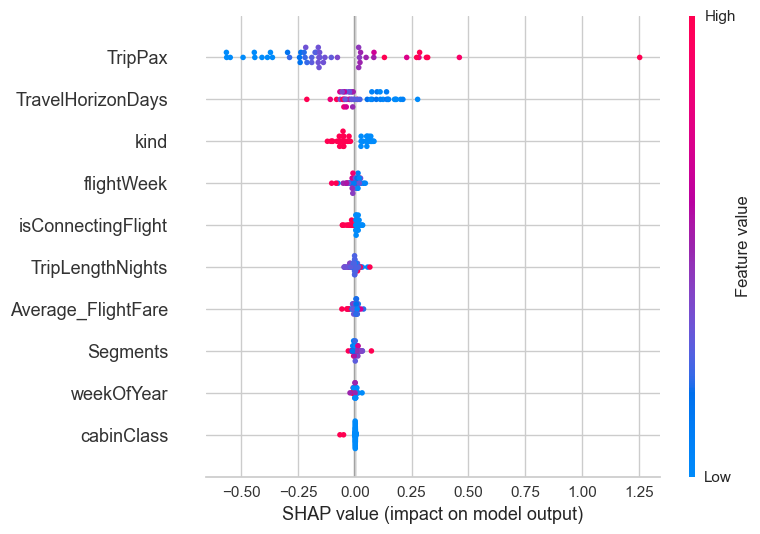

In [23]:
import shap
import matplotlib.pyplot as plt
import xgboost
df_test_sample = df_test.sample(n=min(50, len(df_test)), random_state=42)

if hasattr(final_model, 'steps'):
    model = final_model.steps[-1][1]
else:
    model = final_model

if isinstance(model, (xgboost.XGBRegressor, xgboost.XGBClassifier)):
    explainer = shap.TreeExplainer(model)
else:
    explainer = shap.KernelExplainer(model.predict, df_train[features].iloc[:100, :])  

shap_values = explainer.shap_values(df_test_sample[features])  

shap.summary_plot(shap_values, df_test_sample[features])

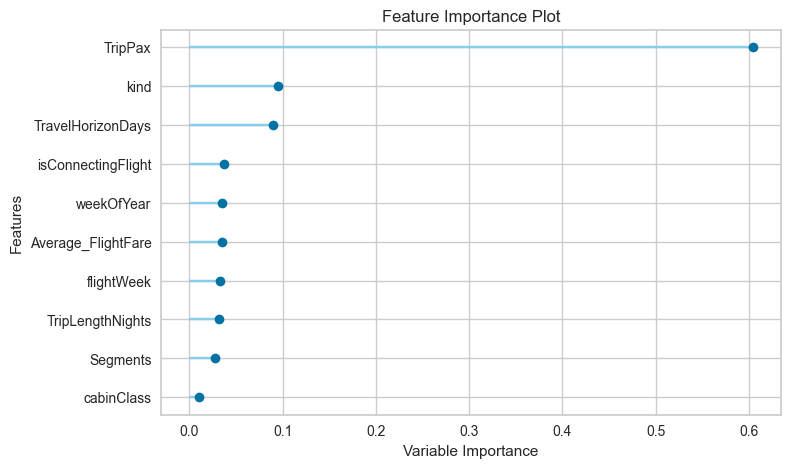

In [24]:
plot_model(final_model, plot='feature')


In [25]:
import plotly.express as px
import pandas as pd

shap_df = pd.DataFrame(shap_values, columns=df_test_sample[features].columns)
shap_df = shap_df.abs().mean(axis=0).reset_index()
shap_df.columns = ['feature', 'impact']
shap_df = shap_df.sort_values(by='impact', ascending=False)

print(shap_df)

fig = px.scatter(
    shap_df,
    x='impact',
    y='feature',
    color='feature',
    title='SHAP Values Impact on Model Output',
    labels={'impact': 'SHAP value (impact on model output)', 'feature': 'Features'}
)

fig.update_layout(yaxis={'categoryorder': 'total ascending'})

fig.show()


              feature    impact
7             TripPax  0.255183
4   TravelHorizonDays  0.077446
1                kind  0.060412
8          flightWeek  0.021912
2  isConnectingFlight  0.016184
3    TripLengthNights  0.015276
5  Average_FlightFare  0.011988
6            Segments  0.011508
9          weekOfYear  0.005163
0          cabinClass  0.004113
